<a href="https://colab.research.google.com/github/nazmul-kaonine/Data-Science-Projects/blob/master/Fruit%20Image%20Classification%20Using%20Baseline%20Resnet50/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Submitted by:
###Nazmul Kaonine
####13300912
####PostGrad- UTS
#####Assignment 2

# Initializing ALL libraries and loader functions

In [ ]:
#import shutil

#shutil.rmtree('Fruit-Images-Dataset')

In [ ]:
import sklearn.datasets
import sklearn.model_selection
import keras.preprocessing.image
import keras.utils
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from skimage import color
from sklearn.metrics import accuracy_score
import keras.callbacks
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from sklearn.preprocessing import LabelBinarizer
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD
from keras.datasets import cifar10
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [ ]:
!git clone https://github.com/Horea94/Fruit-Images-Dataset.git

fatal: destination path 'Fruit-Images-Dataset' already exists and is not an empty directory.


In [ ]:
print(os.listdir("Fruit-Images-Dataset"))

['Test', 'papers', 'LICENSE', 'Training', '.git', 'readme.md', 'test-multiple_fruits', 'src']


In [ ]:
train_data_dir = 'Fruit-Images-Dataset/Training'
test_data_dir = 'Fruit-Images-Dataset/Test'
batch_size = 32


In [ ]:
# hyper-parameters for training
IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS = 100, 100, 3


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )

test_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.6)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=batch_size,
    class_mode='categorical'
    )

validation_generator = test_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
    )

Found 67692 images belonging to 131 classes.
Found 27107 images belonging to 131 classes.
Found 13554 images belonging to 131 classes.


#Some Visualizations

In [ ]:
(train_generator.class_indices)

{'Apple Braeburn': 0,
 'Apple Crimson Snow': 1,
 'Apple Golden 1': 2,
 'Apple Golden 2': 3,
 'Apple Golden 3': 4,
 'Apple Granny Smith': 5,
 'Apple Pink Lady': 6,
 'Apple Red 1': 7,
 'Apple Red 2': 8,
 'Apple Red 3': 9,
 'Apple Red Delicious': 10,
 'Apple Red Yellow 1': 11,
 'Apple Red Yellow 2': 12,
 'Apricot': 13,
 'Avocado': 14,
 'Avocado ripe': 15,
 'Banana': 16,
 'Banana Lady Finger': 17,
 'Banana Red': 18,
 'Beetroot': 19,
 'Blueberry': 20,
 'Cactus fruit': 21,
 'Cantaloupe 1': 22,
 'Cantaloupe 2': 23,
 'Carambula': 24,
 'Cauliflower': 25,
 'Cherry 1': 26,
 'Cherry 2': 27,
 'Cherry Rainier': 28,
 'Cherry Wax Black': 29,
 'Cherry Wax Red': 30,
 'Cherry Wax Yellow': 31,
 'Chestnut': 32,
 'Clementine': 33,
 'Cocos': 34,
 'Corn': 35,
 'Corn Husk': 36,
 'Cucumber Ripe': 37,
 'Cucumber Ripe 2': 38,
 'Dates': 39,
 'Eggplant': 40,
 'Fig': 41,
 'Ginger Root': 42,
 'Granadilla': 43,
 'Grape Blue': 44,
 'Grape Pink': 45,
 'Grape White': 46,
 'Grape White 2': 47,
 'Grape White 3': 48,
 'Grap

50
Grapefruit Pink


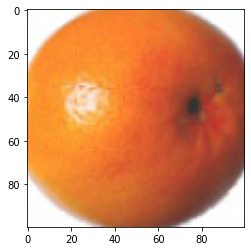

89
Pear Red


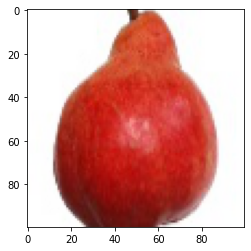

116
Strawberry


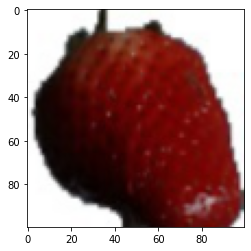

In [ ]:
labels= (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

x,y = train_generator.next()
for i in range(0,3):
    image = x[i]
    label = y[i]
    plt.imshow(image)
    #print (label)
    a= np.where(y[i] == 1)
    k=int(a[0])
    print(k)
    print(labels[k])
    plt.show()

#TESTING 6 Architectures for BASELINE. Final Selection: ResNet50

In [ ]:
INPUT_SHAPE=IMAGE_HEIGHT,IMAGE_WIDTH,NUM_CHANNELS

In [ ]:
from keras.applications import ResNet50
from keras.applications import ResNet50V2
from keras.applications import ResNet101
from keras.applications import MobileNet
from keras.applications import VGG16
from keras.applications import VGG19 

In [ ]:
model=ResNet50()
print(model.summary())

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

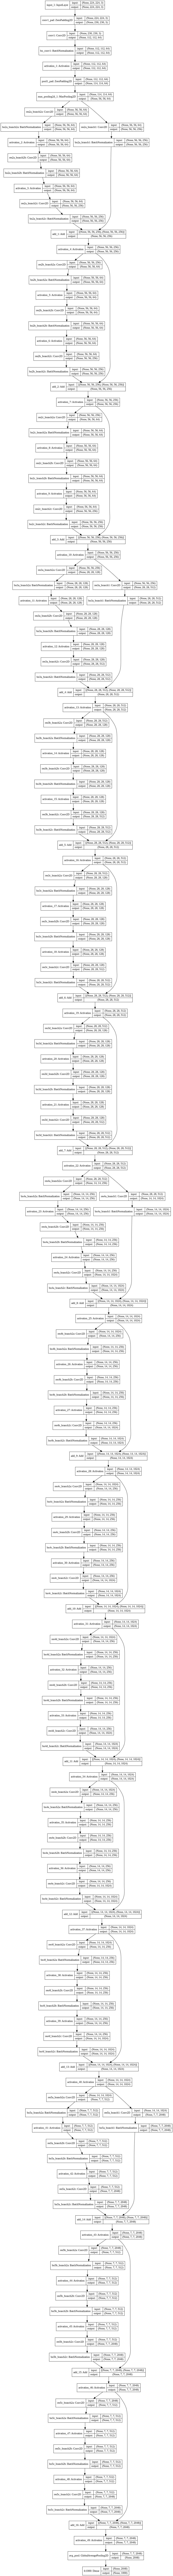

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#Customized

In [ ]:

from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, SGD
    
conv_base = ResNet50(weights='imagenet',include_top=False, input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,NUM_CHANNELS))


from keras import models
from keras import layers
from keras import optimizers

# Load the CONV layers of VGG16 model and add the FC layers

model2 = models.Sequential()
model2.add(conv_base)
model2.add(layers.Dense(131, activation='softmax'))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [ ]:
conv_base.layers.pop

In [ ]:
for layer in conv_base.layers:
    layer.trainable = False

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 131)               268419    
Total params: 23,856,131
Trainable params: 268,419
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
NUM_EPOCHS=1
train_steps = train_generator.n // batch_size
val_steps = validation_generator.n // batch_size
test_steps = test_generator.n // batch_size

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#Callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=False, mode='auto')
callbacks_list = [checkpoint, es]

#model.load_weights("weights.best.hdf5")

In [ ]:
sgd = SGD(lr=1e-1, momentum=0.9, decay=1e-1 / NUM_EPOCHS)
model.compile(loss='categorical_crossentropy',
              optimizer='RmsProp',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_steps,
      epochs=NUM_EPOCHS,
      validation_data=validation_generator,
      validation_steps= val_steps,
      callbacks = callbacks_list,
      verbose=1,
      workers=3,
      use_multiprocessing=True
     )

Epoch 1/1
2115/2115 [==============================] - 16441s 8s/step - loss: 1.3039 - accuracy: 0.6773 - val_loss: 1.4769 - val_accuracy: 0.6639

Epoch 00001: saving model to weights.best.hdf5


In [ ]:
# evaluate performance on train, cross-val & test datasets
loss, acc = model.evaluate_generator(train_generator, steps=train_steps, verbose=1, workers=3)
print('Training data  -> loss: %.3f, acc: %.3f' % (loss, acc))
loss, acc = model.evaluate_generator(validation_generator, steps=val_steps, verbose=1, workers=3)
print('Cross-val data -> loss: %.3f, acc: %.3f' % (loss, acc))
loss, acc = model.evaluate_generator(test_generator, steps=test_steps, verbose=1, workers=3)
print('Testing data   -> loss: %.3f, acc: %.3f' % (loss, acc))

2115/2115 [==============================] - 3360s 2s/step
Training data  -> loss: 1.329, acc: 0.811
847/847 [==============================] - 1295s 2s/step
Cross-val data -> loss: 1.154, acc: 0.664
423/423 [==============================] - 648s 2s/step
Testing data   -> loss: 4.028, acc: 0.688
